<a href="https://colab.research.google.com/github/ades-ship/100-days-of-machine-learning/blob/main/placementHogKiNahi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

In [2]:
df=pd.read_csv('/content/placement.csv')

In [5]:
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [6]:
df=df.iloc[:,1:]

In [7]:
df.head()

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


In [8]:
# Steps

# 0. Preprocess + EDA + Feature Selection
# 1. Extract input and output cols
# 2. Scale the values
# 3. Train test split
# 4. Train the model
# 5. Evaluate the model/model selection
# 6. Deploy the model

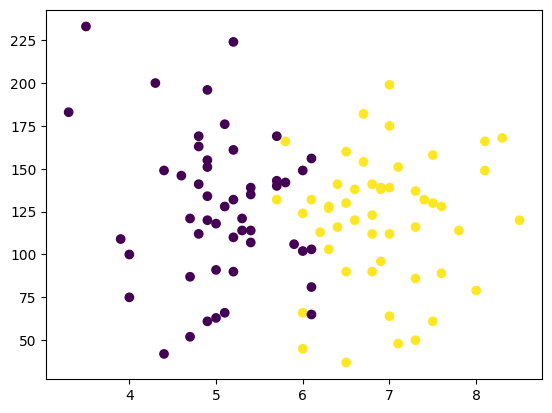

In [9]:
import matplotlib.pyplot as plt

plt.scatter(df['cgpa'],df['iq'],c=df['placement'])


In [10]:
X=df.iloc[:,0:2]
y=df.iloc[:,-1]

In [11]:
X

,cgpa,iq
0,6.8,123.0
1,5.9,106.0
2,5.3,121.0
3,7.4,132.0
4,5.8,142.0
...,...,...
95,4.3,200.0
96,4.4,42.0
97,6.7,182.0
98,6.3,103.0


In [12]:
y.shape

(100,)

In [14]:
from sklearn.model_selection import train_test_split


In [15]:

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.1)

In [16]:
X_train

,cgpa,iq
67,5.0,118.0
71,6.1,132.0
39,4.6,146.0
73,4.9,61.0
20,6.6,120.0
...,...,...
94,4.7,52.0
5,7.1,48.0
86,5.1,128.0
32,7.0,139.0


In [19]:
X_test

,cgpa,iq
9,5.1,66.0
70,6.3,127.0
76,4.9,155.0
0,6.8,123.0
4,5.8,142.0
28,5.2,90.0
89,4.9,151.0
82,6.5,37.0
33,6.0,149.0
85,5.8,166.0


In [22]:
from sklearn.preprocessing import StandardScaler

In [24]:
scaler = StandardScaler()

In [25]:
X_train = scaler.fit_transform(X_train)

In [27]:
X_train

array([[-8.67151331e-01, -1.49091592e-01],
       [ 6.80118691e-02,  2.04020073e-01],
       [-1.20721068e+00,  5.57131739e-01],
       [-9.52166167e-01, -1.58676052e+00],
       [ 4.93086051e-01, -9.86470685e-02],
       [-1.70029673e-02, -1.99031671e+00],
       [-2.31240355e+00,  1.49035543e+00],
       [ 6.63115724e-01,  4.31020430e-01],
       [ 2.10836794e+00, -9.86470685e-02],
       [ 6.63115724e-01, -3.00425163e-01],
       [-8.67151331e-01, -1.53631599e+00],
       [ 8.33145397e-01,  1.28857733e+00],
       [ 6.63115724e-01, -8.55314923e-01],
       [-7.82136495e-01,  1.31379959e+00],
       [-2.72047476e-01,  4.81464954e-01],
       [-8.67151331e-01, -8.30092662e-01],
       [-1.80231453e+00, -3.76091949e-01],
       [-6.12106822e-01, -7.34248067e-02],
       [ 6.80118691e-02,  8.09354357e-01],
       [ 1.25821958e+00,  8.59798881e-01],
       [ 2.38041542e-01, -5.27425520e-01],
       [-9.52166167e-01, -9.86470685e-02],
       [-2.72047476e-01,  4.05798168e-01],
       [ 1.

In [29]:
X_test = scaler.transform(X_test)

In [30]:
X_test

array([[-0.78213649, -1.46064921],
       [ 0.23804154,  0.07790876],
       [-0.95216617,  0.7841321 ],
       [ 0.66311572, -0.02298028],
       [-0.18703264,  0.45624269],
       [-0.69712166, -0.85531492],
       [-0.95216617,  0.68324305],
       [ 0.40807121, -2.1920948 ],
       [-0.01700297,  0.63279852],
       [-0.18703264,  1.06157698]])

In [31]:

from sklearn.linear_model import LogisticRegression

In [32]:
clf=LogisticRegression()

In [33]:
#model training
clf.fit(X_train,y_train)

LogisticRegression()

In [34]:
y_pred=clf.predict(X_test)

In [35]:
y_test

9     0
70    1
76    0
0     1
4     0
28    0
89    0
82    1
33    0
85    1
Name: placement, dtype: int64

In [36]:
# actual m m output kiya h
y_test

9     0
70    1
76    0
0     1
4     0
28    0
89    0
82    1
33    0
85    1
Name: placement, dtype: int64

In [37]:
from sklearn.metrics import accuracy_score

In [38]:
accuracy_score(y_test,y_pred)

0.9

In [39]:
from mlxtend.plotting import plot_decision_regions

<Axes: >

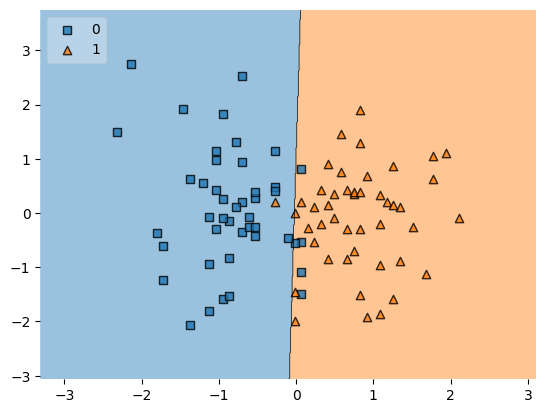

In [40]:
plot_decision_regions(X_train, y_train.values, clf=clf, legend=2)

In [41]:
import pickle

In [42]:
pickle.dump(clf,open('model.pkl','wb'))